<html>
<body>
  <h1>Anime-GAN: Exploring Generative Adversarial Networks</h1>
  <p> In this project, we delve into the realm of generating high-quality anime faces through the application of Deep Convolutional Generative Adversarial Networks (DCGAN). Our dataset comprises 63,632 meticulously selected anime faces, ensuring both quality and visual appeal.

Employing the DCGAN algorithm presents an enticing avenue for crafting lifelike and aesthetically pleasing anime faces. Through the adversarial training of generator and discriminator networks, we unravel a hierarchy of representations, progressing from individual object parts to intricate scenes. This process enables us to produce a myriad of compelling and diverse anime face images.

To demonstrate the prowess of our project, we present a juxtaposition of real and generated anime face images. By discerning between the "real vs. fake" visuals, observers can grasp the caliber and authenticity achieved via the DCGAN algorithm.

Through the fusion of DCGAN's capabilities and an intricately curated anime face dataset, our endeavor seeks to enrich the realm of anime artistry, serving as a valuable asset for researchers, artists, and enthusiasts alike. Embark on this captivating journey with us as we breathe life into beloved anime characters!</p>
</body>
</html>

In [1]:
# Importing necessary libraries and tools for the project
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# Loading and Preparing Anime Face Images Dataset using Keras Image Data Generator
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/animefacedataset',
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 63565 files belonging to 1 classes.


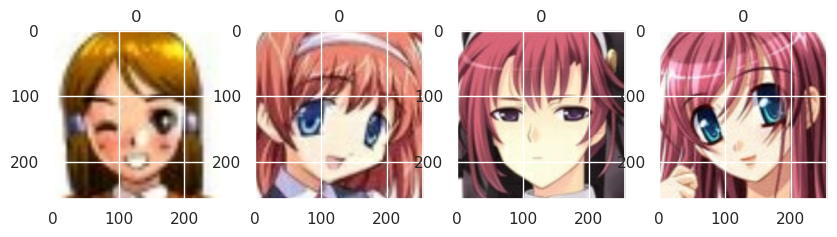

In [3]:
# Visualizing a Batch of Anime Face Images

data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
# Generating Augmented Batches of Anime Face Images using ImageDataGenerator
DIR = '/kaggle/input/animefacedataset' #path to the dataset

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

#train_generator[0]

Found 63565 images belonging to 1 classes.


<html>
<head>
</head>
<body>
  <h1>Deep Convolutional Generative Adversarial Network</h1>
  <p>DCGAN (Deep Convolutional Generative Adversarial Network) is an advanced architecture and training methodology for generative adversarial networks (GANs) specifically designed for image synthesis tasks. It combines deep convolutional neural networks with the adversarial learning framework to generate high-quality and realistic images. </p>
</body>
</html>

<html>
<head>
</head>
<body>
  <h1> The Generator </h1>
  <p>In DCGAN, the generator and discriminator networks play crucial roles. The generator is responsible for generating synthetic images that resemble the target data distribution. It takes random noise as input and gradually transforms it into higher-dimensional outputs using convolutional layers, transposed convolutions, and activation functions like ReLU. Batch normalization is often used to stabilize the learning process. </p>
</body>
</html>

In [ ]:
# from tensorflow.keras.layers import BatchNormalization, LeakyReLU

# def Improved_Generator_Model(input_dim):
#     Generator = Sequential()

#     # Random noise
#     Generator.add(Dense(8 * 8 * 512, input_dim=input_dim))
#     Generator.add(LeakyReLU(alpha=0.2))
#     Generator.add(BatchNormalization(momentum=0.8))
#     # Convert 1d to 3d
#     Generator.add(Reshape((8, 8, 512)))
#     # Unsample
#     Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
#     Generator.add(LeakyReLU(alpha=0.2))
#     Generator.add(BatchNormalization(momentum=0.8))
#     Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
#     Generator.add(LeakyReLU(alpha=0.2))
#     Generator.add(BatchNormalization(momentum=0.8))
#     Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
#     Generator.add(LeakyReLU(alpha=0.2))
#     Generator.add(BatchNormalization(momentum=0.8))
#     Generator.add(Conv2D(3, (4, 4), padding='same', activation='tanh'))

#     return Generator

# generator = Improved_Generator_Model(input_dim)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             9863168   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      2097408   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      524416    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 64)       1

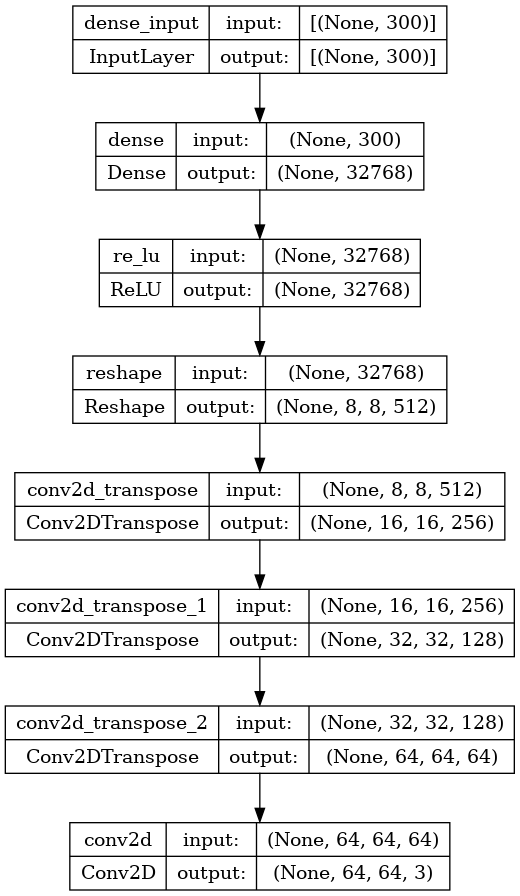

In [5]:
# Creating the Generator Model 

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Generator_Model():

    Generator = Sequential()

    # Random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())

    # Convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))

    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))

    
    return Generator
    
generator = Generator_Model()
generator.summary()

# Visualized Layers of generator
keras.utils.plot_model(generator, show_shapes=True)

<html>
<head>
</head>
<body>
  <h1> The Discriminator </h1>
  <p> The discriminator, on the other hand, aims to distinguish between real and generated images. It utilizes convolutional layers, activation functions, and strided convolutions to downsample the spatial dimensions and capture image features. The discriminator is trained to maximize its ability to correctly classify images as real or fake. </p>
</body>
</html>

In [ ]:
# from tensorflow.keras.layers import Dropout

# def Improved_Discriminator_Model(input_shape):
#     discriminator = Sequential()
#     discriminator.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
#     discriminator.add(LeakyReLU(alpha=0.2))
#     discriminator.add(Dropout(0.25))
#     discriminator.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same'))
#     discriminator.add(LeakyReLU(alpha=0.2))
#     discriminator.add(Dropout(0.25))
#     discriminator.add(Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same'))
#     discriminator.add(LeakyReLU(alpha=0.2))
#     discriminator.add(Dropout(0.25))
#     discriminator.add(Flatten())
#     discriminator.add(Dense(256, activation='LeakyReLU'))
#     discriminator.add(Dropout(0.25))
#     discriminator.add(Dense(1, activation='sigmoid'))

#     return discriminator

# discriminator = Improved_Discriminator_Model((64, 64, 3))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)       

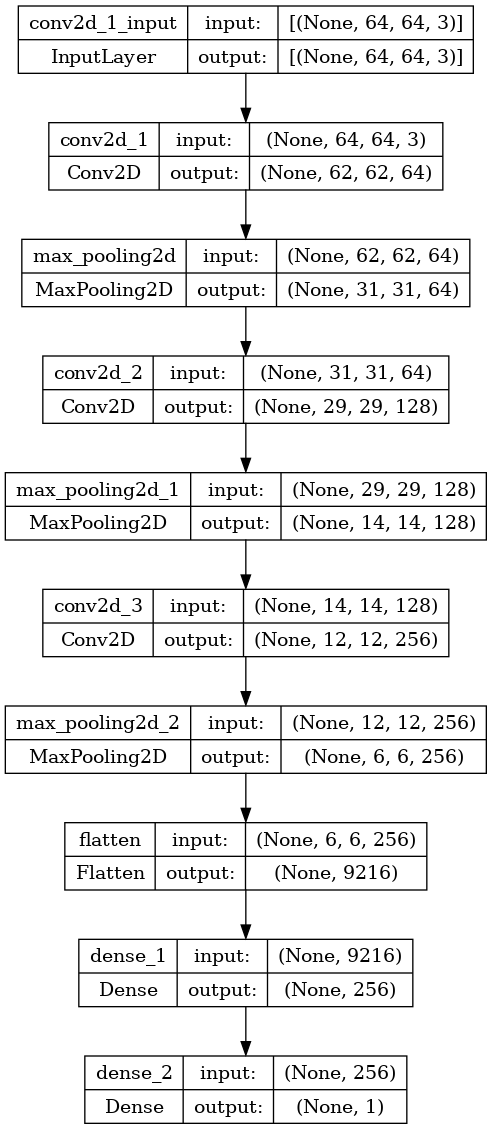

In [6]:
# Creating the discriminator Model 

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64,kernel_size=(3, 3), activation='LeakyReLU', input_shape = input_shape))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(256, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(256, activation='LeakyReLU'))
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# Training The CNN
discriminator = Discriminator_Model()
discriminator.summary()  
# Visualized Layers of discriminator
keras.utils.plot_model(discriminator, show_shapes=True)

<html>
<head>
</head>
<body>
  <h1> The Training Process </h1>
  <p> The training process of DCGAN involves an adversarial interplay between the generator and discriminator. The generator aims to generate increasingly realistic images to deceive the discriminator, while the discriminator strives to improve its discrimination ability. This iterative process continues until the generator produces images that are visually convincing and indistinguishable from real images.
During training, the generator and discriminator networks are updated using techniques like stochastic gradient descent (SGD) or Adam optimization. The Binary Cross Entropy loss function is commonly used to compute the difference between predicted probabilities and target labels for both networks. </p>
</body>
</html>



In [7]:
# DCGAN Model Training Step with Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
    
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))
        
        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)
            
            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            
            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
            
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))
        
        
        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)
            
        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))
        
        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

<html>
<head>
</head>
<body>
  <h1> The Monitoring process </h1>
  <p> To monitor the training progress, callbacks like the DCGANMonitor can be used. This callback generates images from random noise using the trained generator and visualizes them. Additionally, the generator can be saved at the end of training for future use. </p>
</body>
</html>



In [19]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 255) + 255
        g_img.numpy()
        
    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')

In [9]:
# Training DCGAN on Image Dataset for 40 Epochs

epochs = 50
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# Fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor()])

Epoch 1/50
1987/1987 [==============================] - 342s 166ms/step - d_loss: 0.3866 - g_loss: 2.3595
Epoch 2/50
1987/1987 [==============================] - 154s 77ms/step - d_loss: 0.3667 - g_loss: 2.3133
Epoch 3/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.3606 - g_loss: 2.2113
Epoch 4/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.3256 - g_loss: 2.4396
Epoch 5/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.2902 - g_loss: 2.6370
Epoch 6/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.2612 - g_loss: 2.7911
Epoch 7/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.2724 - g_loss: 2.8374
Epoch 8/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.2449 - g_loss: 2.9605
Epoch 9/50
1987/1987 [==============================] - 153s 77ms/step - d_loss: 0.2529 - g_loss: 2.9607
Epoch 10/50
1987/1987 [==============================]

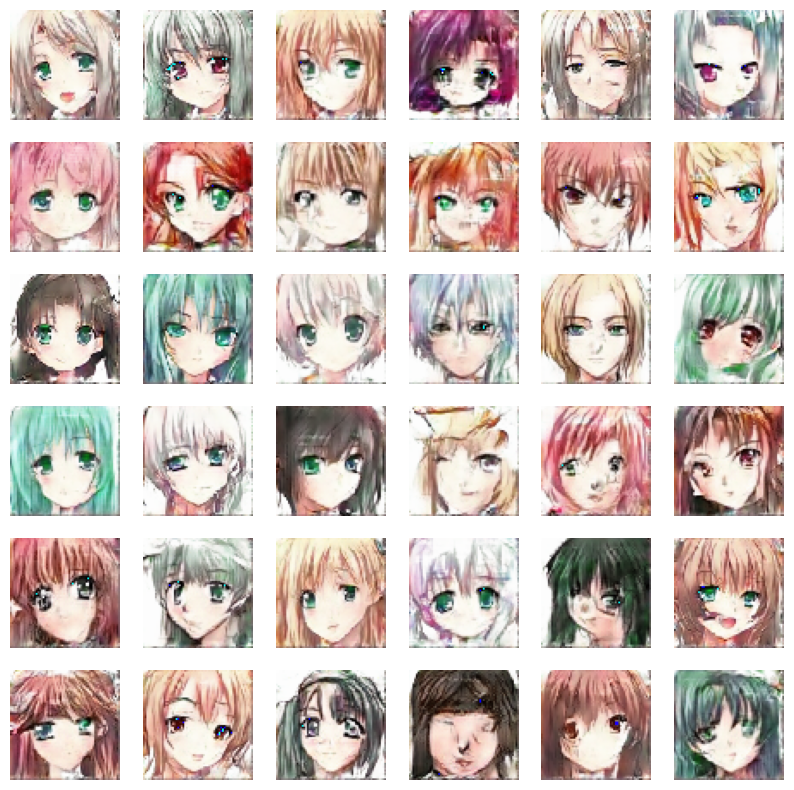

In [18]:
# Generating 36 Random Images with DCGAN

plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

In [13]:
import matplotlib.pyplot as plt

# Function to create a figure for the losses and save it
def create_loss_figure(d_loss_values, g_loss_values, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)  # Save the figure to a file
    plt.close()  # Close the figure to free memory

# Access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# Call the create_loss_figure function with the loss values and specify the filename
create_loss_figure(d_loss_values, g_loss_values, 'loss_figure.png')

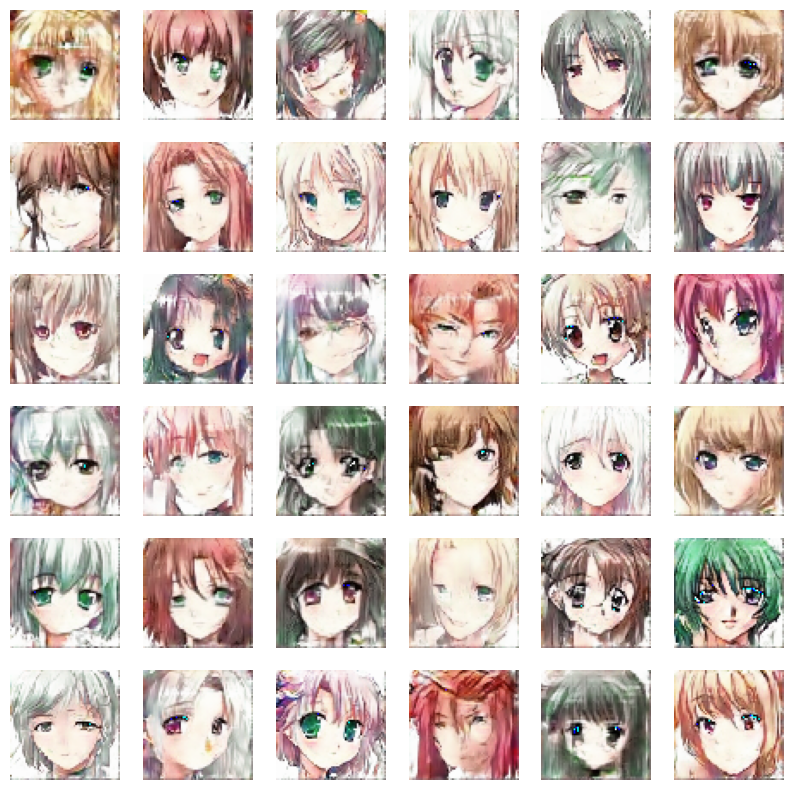

In [20]:
from tensorflow.keras.models import load_model

# Load the saved generator model
generator = load_model('DCGEN.h5')

# Function to generate images using the generator model
def generate_images(generator, num_images, latent_dim):
    noise = tf.random.normal([num_images, latent_dim])
    generated_images = generator(noise)
    generated_images = (generated_images * 255) + 255  # Denormalize
    generated_images.numpy()
    return generated_images

# Generate and display 36 random images
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    generated_image = generate_images(generator, 1, latent_dim)[0]
    image = Image.fromarray(np.uint8(generated_image))
    plt.imshow(image)
    plt.axis('off')
plt.show()